# Import Libraries

In [60]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
from termcolor import colored
from statsmodels.graphics.tsaplots import plot_acf

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from category_encoders import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

# Color pallet and theme
import matplotlib.colors

# Configuration

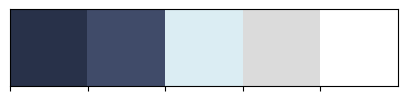

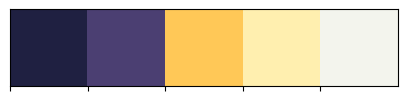

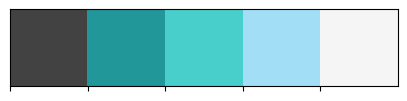

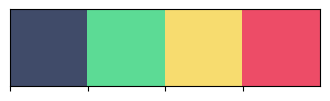

In [61]:
# Colors 1
colors = ["#283149", "#404B69", "#DBEDF3", "#DBDBDB", "#FFFFFF"]
colorsInv = ["#FFFFFF", "#DBDBDB", "#DBEDF3", "#404B69", "#283149"]
palette1 = sns.color_palette(colors)

# Colors 2
colors2 = ["#1F2041", "#4B3F72", "#FFC857", "#FFEFAF", "#F3F4ED"]
colorsInv2 = ["#F3F4ED", "#FFEFAF", "#FFC857", "#4B3F72", "#1F2041"]
palette2 = sns.color_palette(colors2)

# Colors 3
colors3 = ["#424242", "#229799", "#48CFCB", "#A2DFF7", "#F5F5F5"]  
colorsInv3 = ["#F5F5F5", "#A2DFF7", "#48CFCB", "#229799", "#424242"]
palette3 = sns.color_palette(colors3)

# Colors 4
colors4 = ['#404B69', '#5CDB95', '#F7DC6F', '#ED4C67']
colorsInv4 = ['#ED4C67', '#F7DC6F', '#5CDB95', '#404B69']
palette4 = sns.color_palette(colors4)

cmap = matplotlib.colors.ListedColormap(colorsInv)
cmap2 = matplotlib.colors.ListedColormap(colorsInv2)
cmap3 = matplotlib.colors.ListedColormap(colorsInv3)

sns.palplot(sns.color_palette(colors))

sns.palplot(sns.color_palette(colors2))

sns.palplot(sns.color_palette(colors3))

sns.palplot(sns.color_palette(colors4))

pd.set_option('display.max_columns', 40)

# Load Dataset

In [62]:
games = pd.read_csv('../data/games_clean.csv')

In [63]:
games['Release date'] = pd.to_datetime(games['Release date'])

In [64]:
games['Mac'] = games['Mac'].astype(int)

In [65]:
games['Windows'] = games['Windows'].astype(int)

In [66]:
games['Linux'] = games['Linux'].astype(int)

In [67]:
games.columns

Index(['Release date', 'Estimated owners', 'Peak CCU', 'Price', 'DLC count',
       'Supported languages', 'Windows', 'Mac', 'Linux', 'Metacritic score',
       'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Genres',
       '+15'],
      dtype='object')

In [68]:
games.head()

,Release date,Estimated owners,Peak CCU,Price,DLC count,Supported languages,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Genres,+15
0,2021-02-26,> 20000,68,0.00,0,['English'],1,0,0,0,0,87,49,0,0,0,0,0,0,"Adventure,Casual,Free to Play,Massively Multip...",0
1,2014-11-11,> 20000,0,3.99,0,"['English', 'Polish', 'French', 'Italian', 'Ge...",1,1,1,0,0,225,45,32,0,703,0,782,0,"Action,Adventure,Indie",0
2,2019-10-02,> 20000,5,23.49,0,"['English', 'French', 'German', 'Polish', 'Rus...",1,0,0,62,0,589,212,34,427,67,0,93,0,"Indie,RPG",0
3,2016-07-01,> 20000,0,0.00,1,['English'],1,1,0,0,0,147,58,0,0,224,0,257,0,Strategy,0
4,2018-04-06,> 20000,0,2.99,0,['English'],1,1,1,0,0,36,11,19,0,11,0,11,0,"Casual,Indie",0


# Feature Engineering

## Functions

In [69]:
def scores_class(features : pd.DataFrame, target : pd.Series, discrete_features : str):
  score_classify = mutual_info_classif(features, target, discrete_features=discrete_features)
  scores = pd.DataFrame({
    'Feature': features.columns,
    'MI Score (Classify)': score_classify
  })
  return scores.sort_values(by = 'MI Score (Classify)', ascending = False)

def count_languages(word : str):
  word.replace("'", '')
  word.replace("[", '').replace("]", '')
  return len(word.split(','))

## Encode - Feature Categorical

In [70]:
categories = []
for i, row in games.iterrows():
    if type(row['Genres'].split(',')) == list:
        for cat in row['Genres'].split(','): categories.append(cat)

print(len(set(categories)))

33


In [71]:
one_hot_encode = pd.DataFrame()

for category in set(categories):
    cat = []
    for _, row in games.iterrows():
        cat.append(np.int64(category in row['Genres'].split(',')))
    one_hot_encode[category] = cat

one_hot_encode.head()

,Utilities,Audio Production,Photo Editing,Education,RPG,Early Access,Indie,Movie,Game Development,Massively Multiplayer,Tutorial,360 Video,Documentary,Sexual Content,Casual,Web Publishing,Nudity,Animation & Modeling,Free to Play,Software Training,Strategy,Design & Illustration,Violent,Racing,Sports,Video Production,Adventure,Accounting,Action,Short,Episodic,Simulation,Gore
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
games = pd.concat((games, one_hot_encode), axis = 1)

In [73]:
games = games.drop(columns= ['Genres'])

In [74]:
label_encoder = LabelEncoder()
games['Estimated owners'] = label_encoder.fit_transform(games['Estimated owners'])

## New Features

In [75]:
# Count the number of operating systems the game is available on
games['Platform_count'] = games[['Windows', 'Mac', 'Linux']].sum(axis = 1)

In [76]:
# Number of achievements per hour of playtime
games['Achievements_per_hour'] = games.apply(
    lambda x : 
        x['Achievements'] 
        if x['Average playtime forever'] == 0 
        else x['Achievements'] / x['Average playtime forever'],
    axis = 1
)

In [77]:
# Amount of genres the game is available in
games['Genre_count'] = games[list(set(categories))].sum(axis = 1)

In [78]:
# Ratio of recent playtime to total playtime
games['Recent_playtime_ratio'] = games.apply(
    lambda x : 
        x['Average playtime two weeks'] 
        if x['Average playtime forever'] == 0 
        else x['Average playtime two weeks'] / x['Average playtime forever'],
    axis = 1
)

In [79]:
# Count the number of languages the game is available in
games['Language_count'] = games['Supported languages'].apply(count_languages)

In [80]:
# Ratio of quantity of operating systems the game is available on
games['OS_ratio'] = (games[['Windows', 'Mac', 'Linux']].sum(axis = 1) / 3).astype(float)

In [81]:
# Antiquity of the game
games['Antiquity'] = (pd.to_datetime('today') - games['Release date']).dt.days

In [82]:
# Recommendations user based on the genre
games['Recommendation_per_genre'] = games['Recommendations'] / games['Genre_count']

In [83]:
# games['Ratio_Recommendation_EstimatedOwner'] = games['Recommendations'] / (games['Estimated owners'] + 1)

In [84]:
games.drop(columns = ['Supported languages', 'Release date'], inplace = True)

## Visualization

In [85]:
ignore_columns = categories + ['Estimated owners', 'Windows', 'Mac', 'Linux', '+15']

In [86]:
games_num = games.select_dtypes(include = np.number).drop(columns = ignore_columns)

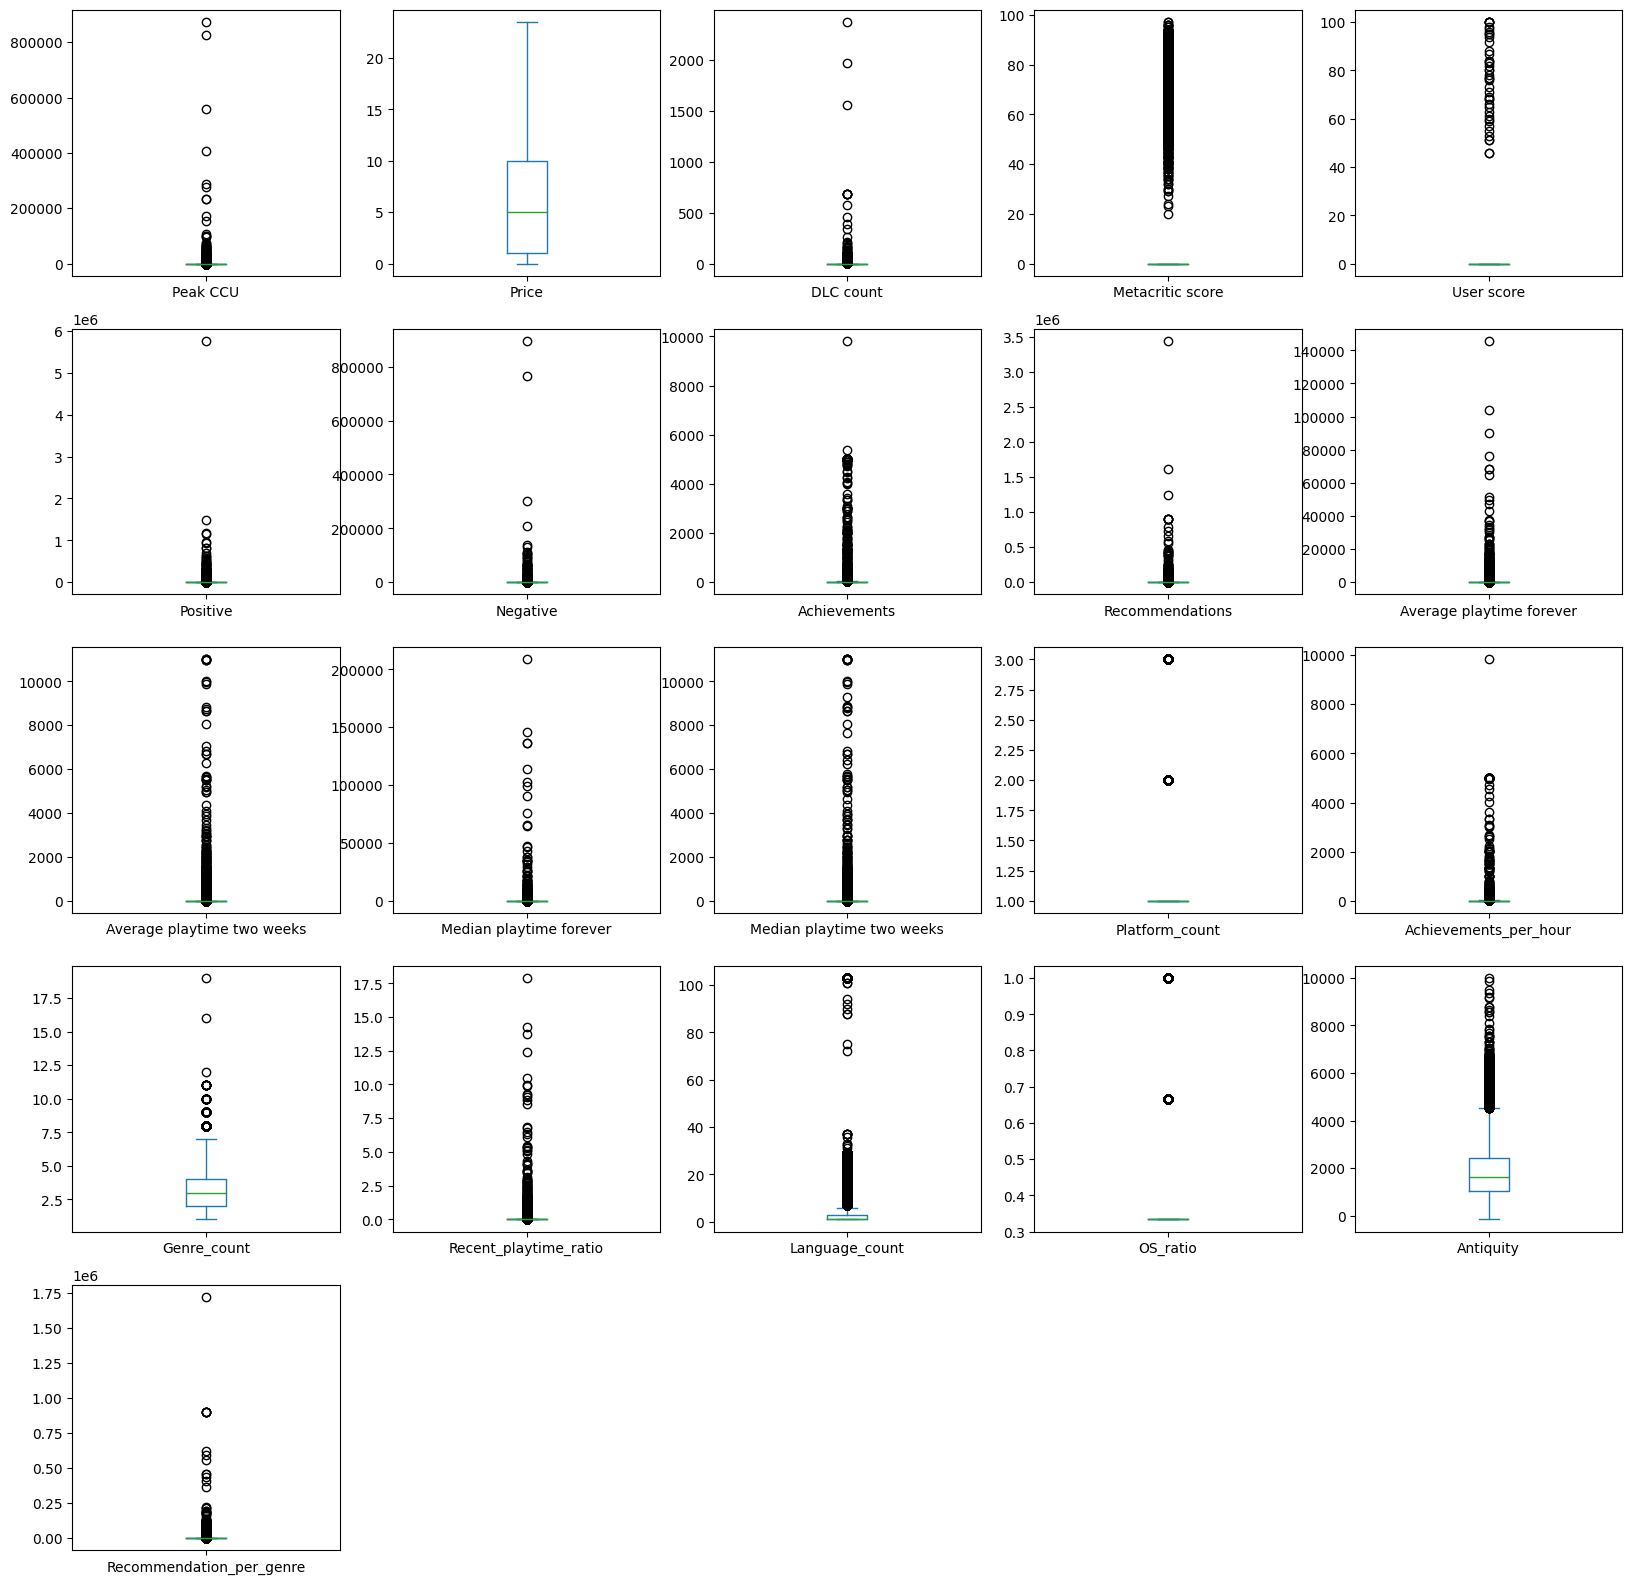

In [87]:
games_num.plot(kind = 'box', subplots = True, layout = (5, 5), figsize = (20, 20))
plt.show()

## Normalization

In [88]:
games_labels = games['Estimated owners'].copy()
games = games.drop('Estimated owners', axis = 1)

### Min-Max Scaler

In [89]:
minmax_columns = ['Price', 'OS_ratio', 'Platform_count']

In [90]:
minmax_scaler = MinMaxScaler()
games_minmax_scaled = minmax_scaler.fit_transform(games[minmax_columns])

In [91]:
minmax_df = pd.DataFrame(games_minmax_scaled, 
                          columns= minmax_scaler.get_feature_names_out())

### Robust Scaler

In [92]:
robust_columns = games_num.columns.to_list()

In [93]:
robust_scaler = RobustScaler()
games_robust_scaled = robust_scaler.fit_transform(games[robust_columns].drop(columns = minmax_columns))

In [94]:
robust_df = pd.DataFrame(games_robust_scaled, 
                         columns = robust_scaler.get_feature_names_out())

In [95]:
df_result = pd.concat((robust_df, minmax_df, games.drop(columns = robust_columns + minmax_columns)), axis = 1)

### Mutual Information

In [96]:
scores = scores_class(df_result, games_labels, discrete_features = 'auto')

In [97]:
scores

,Feature,MI Score (Classify)
4,Positive,0.400436
5,Negative,0.347185
16,Antiquity,0.248139
8,Average playtime forever,0.188322
10,Median playtime forever,0.183172
18,Price,0.178736
7,Recommendations,0.162128
17,Recommendation_per_genre,0.161876
0,Peak CCU,0.133716
12,Achievements_per_hour,0.126743


In [98]:
drop_columns = scores[scores['MI Score (Classify)'] < 0.005]

In [99]:
df_result.drop(columns = drop_columns['Feature'].values, inplace = True)

In [100]:
df_result.columns

Index(['Peak CCU', 'DLC count', 'Metacritic score', 'Positive', 'Negative',
       'Achievements', 'Recommendations', 'Average playtime forever',
       'Average playtime two weeks', 'Median playtime forever',
       'Median playtime two weeks', 'Achievements_per_hour', 'Genre_count',
       'Recent_playtime_ratio', 'Language_count', 'Antiquity',
       'Recommendation_per_genre', 'Price', 'OS_ratio', 'Platform_count',
       'Windows', 'Mac', 'RPG', 'Indie', 'Massively Multiplayer', 'Casual',
       'Free to Play', 'Strategy', 'Design & Illustration', 'Adventure'],
      dtype='object')

### PCA

In [101]:
pca = PCA(n_components = 5)
principal_components = pca.fit_transform(df_result)

pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])

In [102]:
# Obtener las columnas originales utilizadas por el PCA
pca.explained_variance_

array([5.09311489e+08, 2.84260833e+07, 1.49282143e+07, 3.96092952e+06,
       1.88359783e+05])

In [103]:
sum(pca.explained_variance_ratio_)

0.9997726344898982

In [104]:
pca_df.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-1020.990137,41.262743,54.893273,-148.076043,30.816470
1,-1021.016055,3.083712,11.656653,897.058961,-84.973230
2,-556.332070,-49.066487,-37.848893,-36.309681,31.535324
3,-1027.174701,-10.257326,17.538178,191.851811,-2.330485
4,-1029.999848,-16.337031,20.277566,-131.962845,27.468040


In [105]:
# Calculate percentage variation
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

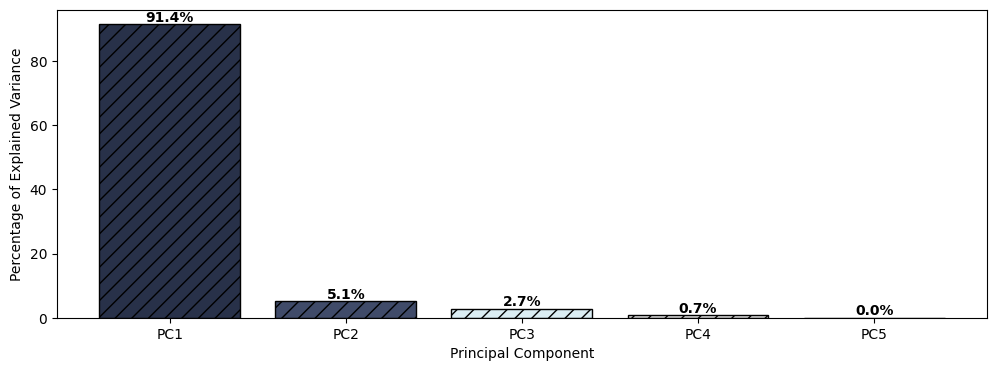

In [106]:
# Variance explained by each dimension
fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels, color = colors, edgecolor='black', hatch='//')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{per_var[i]}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.show()

In [107]:
df_result = pd.concat((df_result, pca_df, games_labels), axis = 1)

# Save dataset

In [108]:
df_result.to_csv('../data/games_normalized_clean.csv', index = False)

In [109]:
from joblib import dump

# Exportar el PCA
dump(pca, '../models/pca_model.joblib')

['../models/pca_model.joblib']

In [110]:
# Exportar el MinMaxScaler
dump(minmax_scaler, '../models/minmax_scaler.joblib')

# Exportar el RobustScaler
dump(robust_scaler, '../models/robust_scaler.joblib')

['../models/robust_scaler.joblib']